In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


df= pd.read_pickle('../../../data/Top Fund Positioning/t10_full_universe_weights_20230831.pkl')
df = df.reset_index()
df =df[df['lionshares_id']!='MFRKX-US']
df=df.set_index(['lionshares_id','Symbol'])

### Abstract
In this analysis, we aim to analyze how active fund managers are positioning at the industry level, respective to their specific benchmarks

### Background
To generate our dataset, we pass each fund into the PA Engine API and generate a weights report as of most recent month end

- Funds were selected via fund screen
    - Activevly Managed
    - Benchmark is listed on FactSet and is one of: 
       - S&P 500
       - Russell 1-3 Core, Growth & Value
       - MSCI EM, ACWI ex US, World, EAFE
    - Top 10 by AUM per benchmark (25 for S&P 500)


### Preview Security Level Data

In [3]:
df.head()

Security Name Ticker-Region  \
lionshares_id Symbol                                           
JUEMX-US      594918104  Microsoft Corporation       MSFT-US   
              037833100             Apple Inc.       AAPL-US   
              67066G104     NVIDIA Corporation       NVDA-US   
              023135106       Amazon.com, Inc.       AMZN-US   
              02079K305  Alphabet Inc. Class A      GOOGL-US   

                                    GICS Sector  \
lionshares_id Symbol                              
JUEMX-US      594918104  Information Technology   
              037833100  Information Technology   
              67066G104  Information Technology   
              023135106  Consumer Discretionary   
              02079K305  Communication Services   

                                                GICS Industry Name  \
lionshares_id Symbol                                                 
JUEMX-US      594918104                                   Software   
              037833100  Technology Hardware Storage & Peripherals   
              67066G104   Semiconductors & Semiconductor Equipment   
              023135106                           Broadline Retail   
              02079K305               Interactive Media & Services   

                                                  GICS Industry Group  \
lionshares_id Symbol                                                    
JUEMX-US      594918104                           Software & Services   
              037833100               Technology Hardware & Equipment   
              67066G104      Semiconductors & Semiconductor Equipment   
              023135106  Consumer Discretionary Distribution & Retail   
              02079K305                         Media & Entertainment   

                                                 GICS Sub Industry  \
lionshares_id Symbol                                                 
JUEMX-US      594918104                           Systems Software   
              037833100  Technology Hardware Storage & Peripherals   
              67066G104                             Semiconductors   
              023135106                           Broadline Retail   
              02079K305               Interactive Media & Services   

                        Region of Domicile   MSCI Country P_Country  \
lionshares_id Symbol                                                  
JUEMX-US      594918104      North America  United States        US   
              037833100      North America  United States        US   
              67066G104      North America  United States        US   
              023135106      North America  United States        US   
              02079K305      North America  United States        US   

                            FF_Country  ...  Active Weight     Asset Type  \
lionshares_id Symbol                    ...                                 
JUEMX-US      594918104  UNITED STATES  ...       2.753458  Equity Common   
              037833100  UNITED STATES  ...      -1.505110  Equity Common   
              67066G104  UNITED STATES  ...       1.047936  Equity Common   
              023135106  UNITED STATES  ...       0.556445  Equity Common   
              02079K305  UNITED STATES  ...       1.210812  Equity Common   

                         Asset Class      DATE  Fund Ticker          FFD_NAME  \
lionshares_id Symbol                                                            
JUEMX-US      594918104       Equity  20230831        JUEMX  JPMorgan Trust I   
              037833100       Equity  20230831        JUEMX  JPMorgan Trust I   
              67066G104       Equity  20230831        JUEMX  JPMorgan Trust I   
              023135106       Equity  20230831        JUEMX  JPMorgan Trust I   
              02079K305       Equity  20230831        JUEMX  JPMorgan Trust I   

                        P_PRICE(0,USD)           aum bench_id Fund Brand  
lionshares_id Symbol                               

### Security Level - Average Individual Security Active Exposure

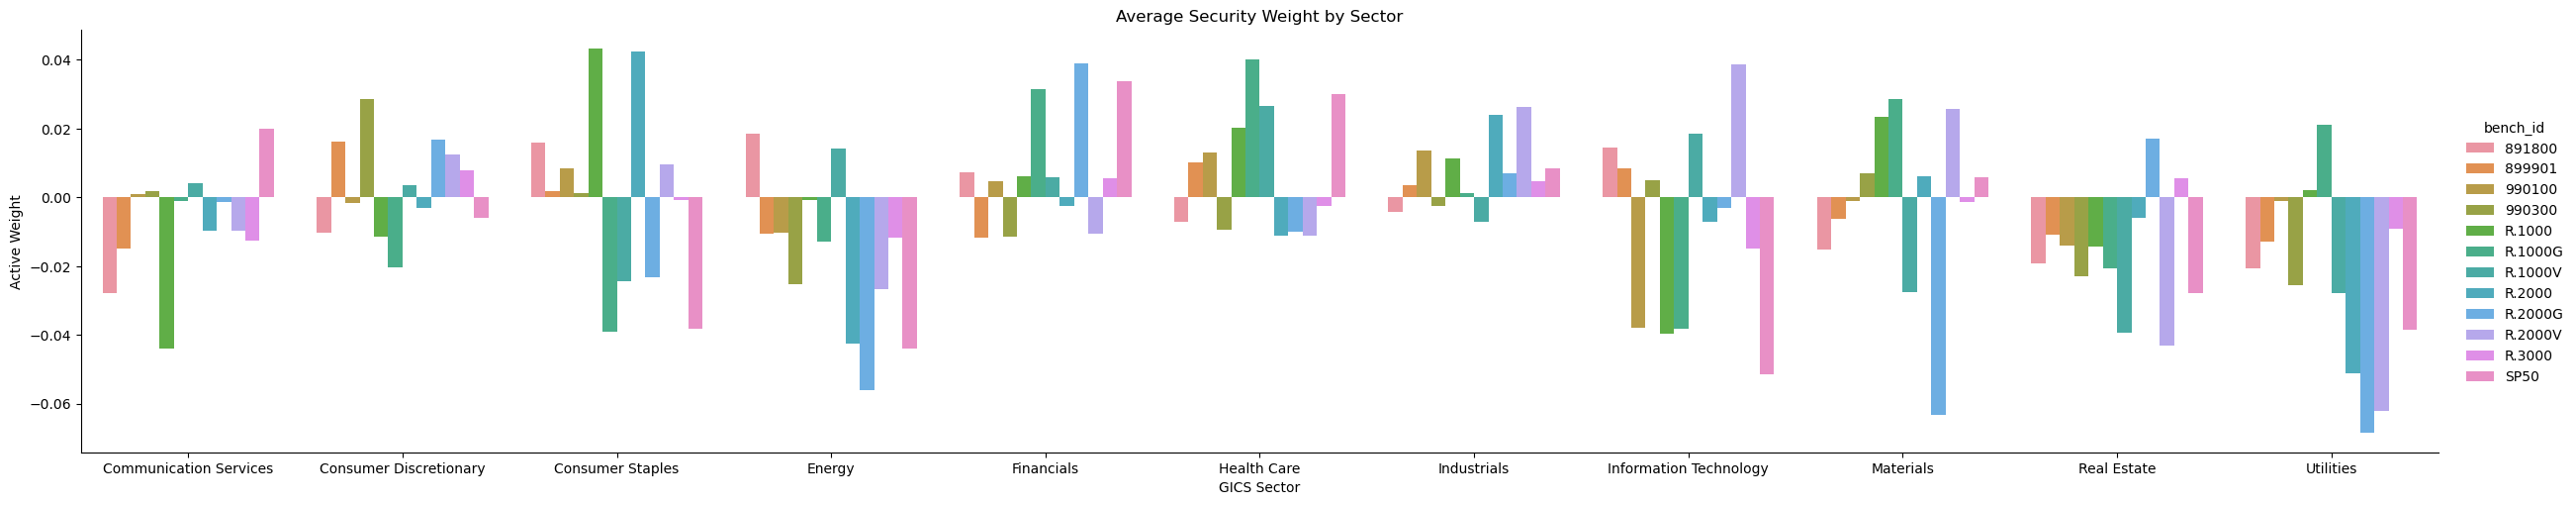

In [9]:
df_plot = df[df['GICS Sector']!='Other'].groupby(['bench_id','GICS Sector']).agg({'Active Weight':'mean'})
sns.catplot(data=df_plot.reset_index(),
            x = 'GICS Sector',
            y = 'Active Weight',
            hue = 'bench_id',  
            kind = 'bar',
            aspect = 5,
            )
plt.title('Average Security Weight by Sector')
plt.show()

### Sector Level - Entire Universe Active Exposures Distributions

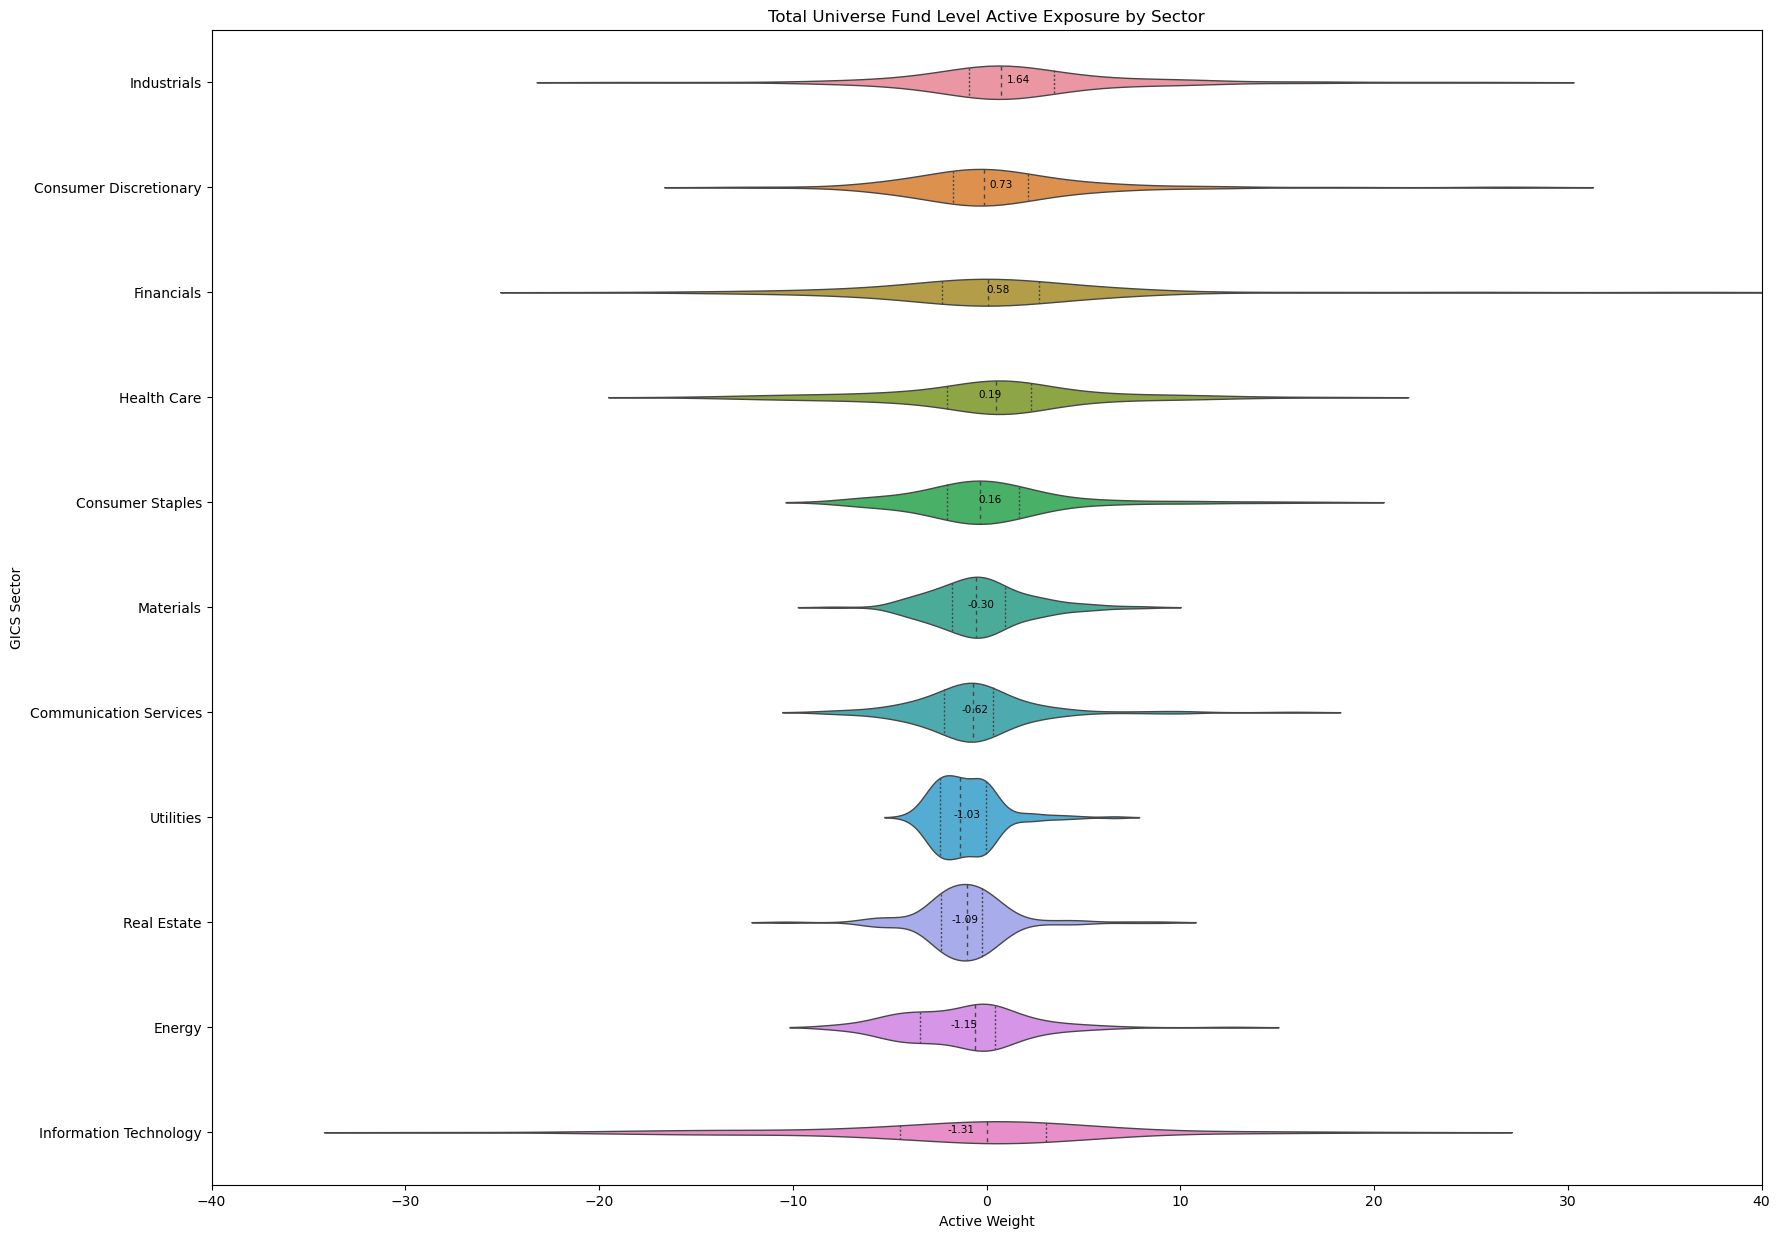

In [5]:
fig, axs = plt.subplots(figsize=(20,15))  #
df_aggregated = df[df['GICS Sector']!='Other'].groupby(['bench_id','GICS Sector','Fund Ticker']).agg({'Active Weight':'sum'}).reset_index()

# Calculate means for each sector
mean_aw = df_aggregated.groupby('GICS Sector')['Active Weight'].mean()
sectors = mean_aw.sort_values(ascending =False).index 

sns.violinplot(data=df_aggregated ,y="GICS Sector", x="Active Weight",order=sectors,
               inner="quart", linewidth=1,orient ='h')

plt.xlim(-40,40)
# Add mean labels to violin plot
for i, sector in enumerate(sectors):
    axs.text(mean_aw[sector], i, "{:.2f}".format(mean_aw[sector]), fontsize=7.5, ha='center')
plt.title('Total Universe Fund Level Active Exposure by Sector')
#plt.savefig('top_fund_positioning_avg_sector_active_exp_violinplots.png')
plt.show()

### Sector Level - Average Sector Level Active Exposure relative to Benchmark

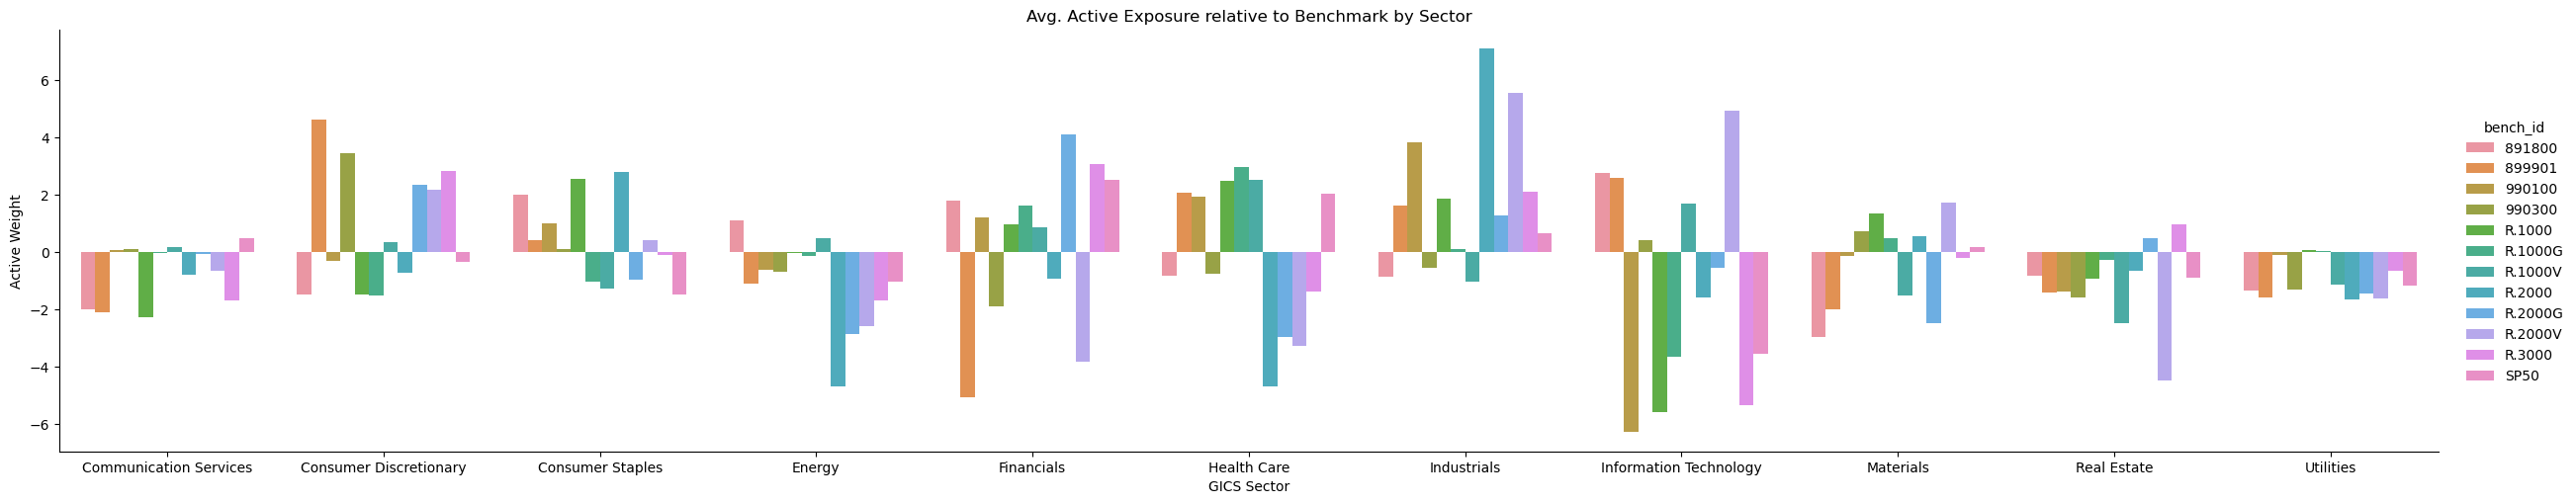

In [4]:
df_plot = df[df['GICS Sector']!='Other'].groupby(['bench_id','lionshares_id','GICS Sector']).agg({'Active Weight':'sum'}).groupby(['bench_id','GICS Sector']).agg({'Active Weight':'mean'})
sns.catplot(data=df_plot.reset_index(),
            x = 'GICS Sector',
            y = 'Active Weight',
            hue = 'bench_id',  
            kind = 'bar',
            aspect = 5,
            )
plt.title('Avg. Active Exposure relative to Benchmark by Sector')
#plt.savefig('top_fund_positioning_avg_sector_active_exp_catplot.png')
plt.show()

### Sector Level - Average Sector Level Active Exposure relative to Benchmark

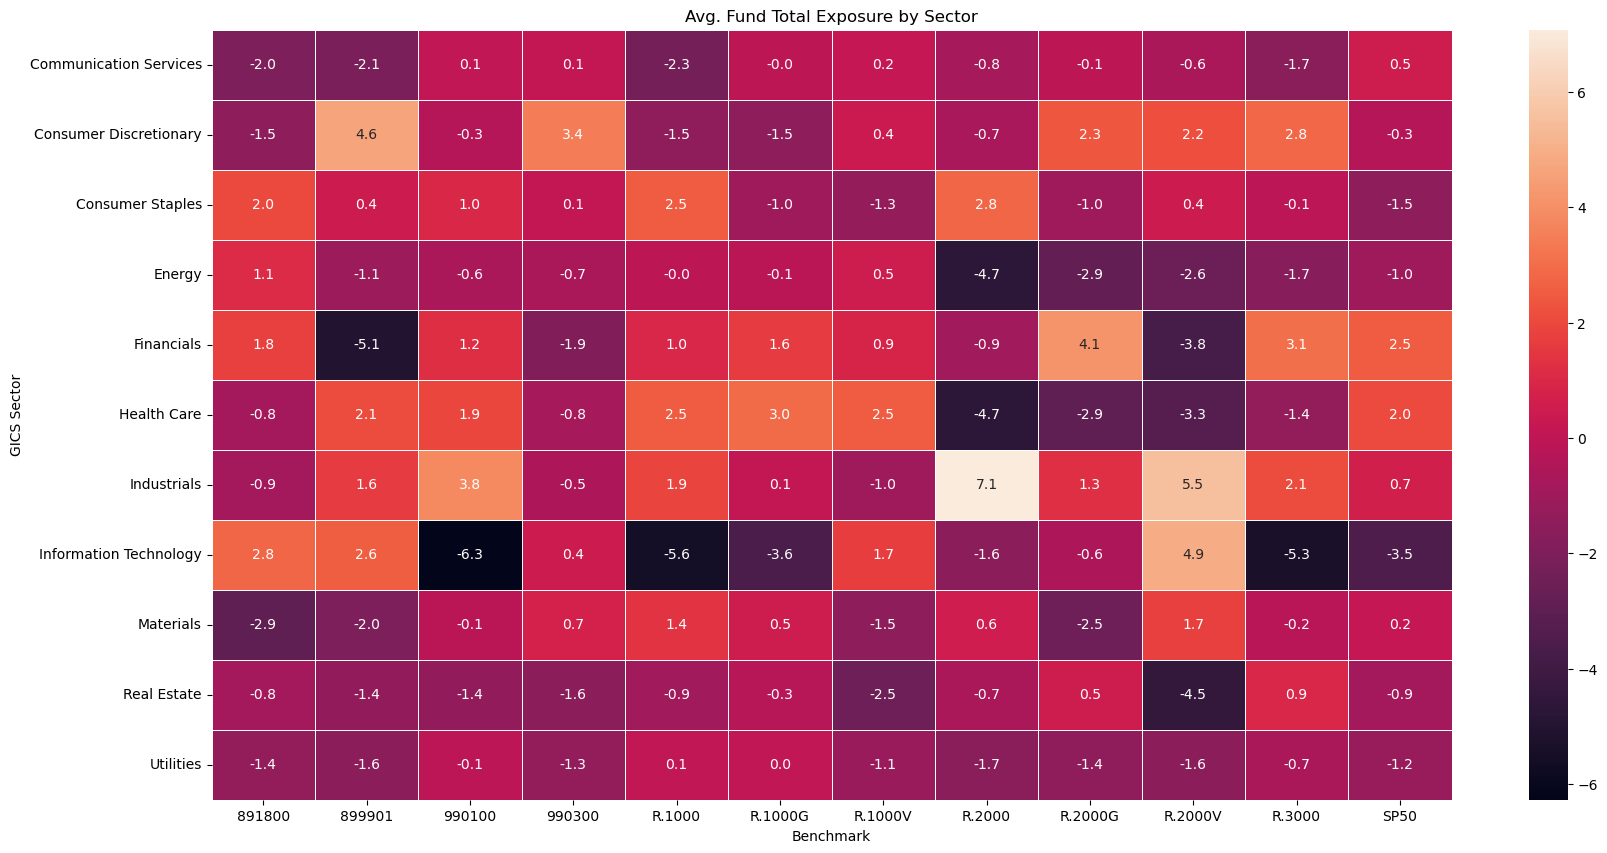

In [6]:
fig,axs = plt.subplots(figsize=(20,10))
sns.heatmap(df[df['GICS Sector']!='Other'].groupby(['bench_id','lionshares_id','GICS Sector']).agg({'Active Weight':'sum'}).reset_index().groupby(['bench_id','GICS Sector']).agg({'Active Weight':'mean'}).unstack().droplevel(0,axis=1).T,
            linewidth=.5,annot=True,fmt=".1f")

plt.title("Avg. Fund Total Exposure by Sector")
plt.xlabel('Benchmark')
#plt.savefig('top_fund_positioning_avg_sector_active_exp_heatmap.png')
plt.show()